# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [1]:
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('../datasets/users_behavior.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


## Разбейте данные на выборки

Поскольку тестовой выборки нет, то будем делить наш разбивать наш датасет в соотношении 3:1:1, где 3 - тренировочная выборка, 1 - валидационная и 1 - тестовая. Для справедливости разбивки укажем параметр stratify.

In [12]:
features = df.drop('is_ultra', axis=1)
target = df['is_ultra']

features_for_split, features_test, target_for_split, target_test = train_test_split(features, target, test_size=0.2,
                                                                                    random_state=12345, stratify=target)

features_train, features_valid, target_train, target_valid = train_test_split(features_for_split, target_for_split,
                                                                              test_size=0.25, random_state=12345, stratify=target_for_split)

## Исследуйте модели

Создадим словарь, чтобы записывать в него лучшие модели и их точности на валидационной выборке.

In [6]:
dict_model = {}

Поскольку дерево сильно склонно к переобучению, то установим небольшую глубину 2-5.

In [7]:
best_model_tree = None
best_result_tree = 0
arr_acc_train = list()
arr_acc_valid = list()

for depth in range(2, 4):
    model_tree = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model_tree.fit(features_train, target_train)
    arr_acc_train.append(model_tree.score(features_train, target_train))
    predictions = model_tree.predict(features_valid)
    result = accuracy_score(target_valid, predictions)
    arr_acc_valid.append(result)
    if result > best_result_tree:
        best_result_tree = result
        best_model_tree = model_tree
dict_model[best_model_tree] = best_result_tree

print("Лучшая точность:", best_result_tree)

Лучшая точность: 0.7651632970451011


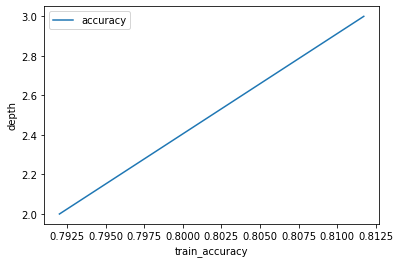

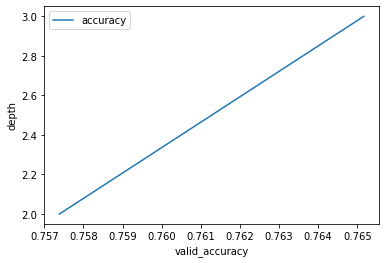

In [8]:
df_plot = pd.DataFrame({'valid_accuracy': arr_acc_valid, 'train_accuracy': arr_acc_train, 'depth': range(2, 4)})

df_plot.plot(x='train_accuracy', y='depth')
plt.ylabel('depth')
plt.legend(['accuracy'])
plt.show()
df_plot.plot(x='valid_accuracy', y='depth')
plt.ylabel('depth')
plt.legend(['accuracy'])
plt.show()

Точность 0.76 для одного дерева - впечатляет, посмотрим как другие проявят себя.

Тут уже лес, но он также склонен к переобучению, хоть и не так сильно как отдельное дерево, поэтому укажем глубину здесь побольше: 3-9, и количество деревьев 3-7.

In [ ]:
best_model_forest = None
best_result_forest = 0
arr_acc_train = list()
arr_acc_valid = list()
for trees in range(3, 8):
    for depth in range(3, 10):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=trees, max_depth=depth)
        model_forest.fit(features_train, target_train)
        arr_acc_train.append(model_forest.score(features_train, target_train))
        predictions = model_forest.predict(features_valid)
        result = accuracy_score(target_valid, predictions)
        arr_acc_valid.append(result)
        if result > best_result_tree:
            best_result_forest = result
            best_model_forest = model_forest
dict_model[best_model_forest] = best_result_forest

In [ ]:
df_plot = pd.DataFrame({'valid_accuracy': arr_acc_valid, 'train_accuracy': arr_acc_train})

plt.plot(df_plot['valid_accuracy']);
plt.legend(['valid_accuracy'])
plt.show()


plt.plot(df_plot['train_accuracy']);
plt.legend(['train_accuracy'])
plt.show()

Тут можно поиграться с количеством итераций, однако после 100 точность не меняется.

In [ ]:
best_model_logic = None
best_result_logic = 0

model_logic = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=100)
model_logic.fit(features_train, target_train)
arr_acc_train.append(model_logic.score(features_train, target_train))
result = model_logic.score(features_valid, target_valid)
arr_acc_valid.append(result)
dict_model[model_logic] = result

In [ ]:
dict_model

## Проверьте модель на тестовой выборке

Хоть есть и фаворит - Случайный лес, все равно было бы неплохо пройтись по всем моделям, вдруг что-то измениться.

In [ ]:
best_model = None
best_result = 0
for models, results in dict_model.items():
    if models.score(features_test, target_test) > best_result:
        best_result = models.score(features_test, target_test)
        best_model = models
print("Лучшая модель:", best_model)
print("Точность этой модели:", best_result)

Точность 0.78 - довольно неплохо при таком малом урегулировании параметров моделей.

In [ ]:
# text_represent = tree.export_text(best_model_tree)
# print(text_represent)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))
print(features.columns)
_ = tree.plot_tree(best_model_tree,
                   feature_names=features.columns,
                   class_names=['0', '1'],
                   filled=True)
plt.show()

## (бонус) Проверьте модели на адекватность

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [ ] Весь код исполняется без ошибок
- [ ] Ячейки с кодом расположены в порядке исполнения
- [ ] Выполнено задание 1: данные загружены и изучены
- [ ] Выполнено задание 2: данные разбиты на три выборки
- [ ] Выполнено задание 3: проведено исследование моделей
    - [ ] Рассмотрено больше одной модели
    - [ ] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [ ] Написаны выводы по результатам исследования
- [ ] Выполнено задание 3: Проведено тестирование
- [ ] Удалось достичь accuracy не меньше 0.75
